In [185]:
#Creating Dataset
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [186]:
#Load Dataset
Home_data = pd.read_csv('HomeC.csv')
nan_removed = pd.DataFrame.dropna(pd.DataFrame(Home_data))
nan_removed.value_counts()
duplicate_removed = (nan_removed[['summary', 'windSpeed', 'apparentTemperature', 'dewPoint', 'temperature']].drop_duplicates()).round()
duplicate_removed['summary'].value_counts()

C:\Users\M-SI\AppData\Local\Temp\ipykernel_19704\839172366.py:2: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  Home_data = pd.read_csv('HomeC.csv')


summary
Clear                       6549
Partly Cloudy               1083
Light Rain                   476
Drizzle                      180
Overcast                     105
Rain                          90
Mostly Cloudy                 79
Light Snow                    75
Flurries                      31
Breezy                        27
Snow                          20
Breezy and Partly Cloudy      18
Foggy                         17
Rain and Breezy                3
Heavy Snow                     3
Flurries and Breezy            2
Breezy and Mostly Cloudy       1
Dry                            1
Name: count, dtype: int64

In [187]:
# split the dataframe into 3 type of summary Clear, Cloudy, and other
clear = duplicate_removed[duplicate_removed['summary'] == 'Clear']
cloudy = duplicate_removed[duplicate_removed['summary'] == 'Overcast']
other = duplicate_removed[(duplicate_removed['summary'] != 'Clear') & (duplicate_removed['summary'] != 'Overcast')]
other['summary'] = 'Other'

C:\Users\M-SI\AppData\Local\Temp\ipykernel_19704\1364489543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['summary'] = 'Other'


In [188]:
# combine the 3 dataframe into 1
frames = [clear, cloudy, other]
result = pd.concat(frames)

# change the summary into numerical value
result['summary'] = result['summary'].map({'Clear': 0, 'Overcast': -1, 'Other': 1})
result = result.reset_index(drop=True)

In [189]:
# get X and y
X1 = (result[['apparentTemperature', 'dewPoint']]).values
X2 = (result[['windSpeed', 'dewPoint']]).values
y = result['summary'].values

First five rows and col values 
X1 : 
 [[29. 24.]
 [29. 23.]
 [31. 24.]
 [30. 24.]
 [30. 25.]]  
 y :
 [0 0 0 0 0]


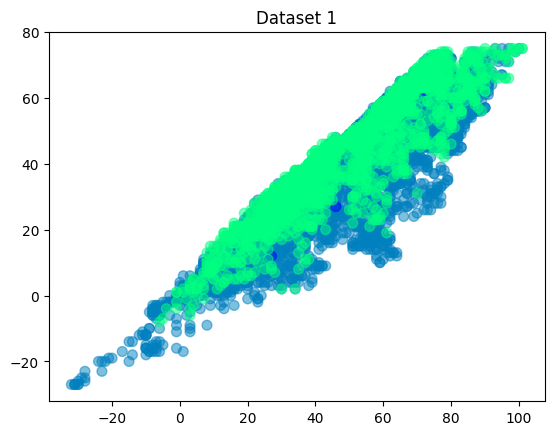

In [190]:
print("First five rows and col values \nX1 : \n",X1[:5], " \n y :\n",y[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

In [191]:
#Generating SVM soft Margin
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):
        
        n_samples, n_features = X.shape        
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initializewith 0
        
        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 : 
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i])) # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i] # b = b - α* (yi)
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
        return result

In [192]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [193]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title(title)
    plt.show()

For dataset 1, score: 0.2404109589041096


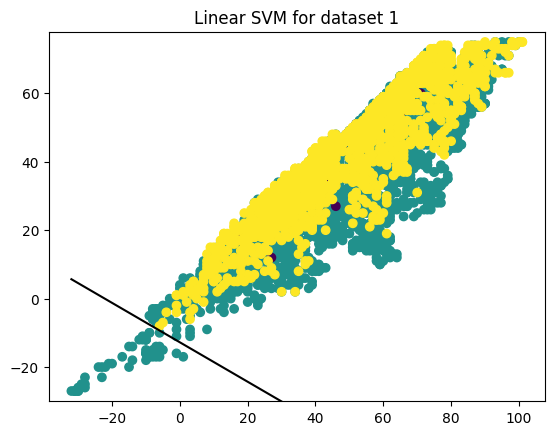

In [194]:
#Implementing into each Datasets
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X1,y)
print("For dataset 1, score:" ,accuracy_score(svm1.predict(X1),y))
plot_svm(X1, y, w1, b1, title= 'Linear SVM for dataset 1')

For dataset 1, score: 0.2404109589041096


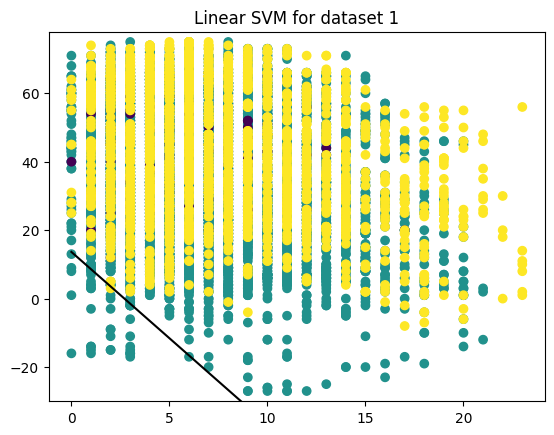

In [195]:
#Implementing into each Datasets
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X2,y)
print("For dataset 1, score:" ,accuracy_score(svm1.predict(X2),y))
plot_svm(X2, y, w1, b1, title= 'Linear SVM for dataset 1')